In [1]:
#Imports

import numpy as np
import matplotlib.pyplot as plt

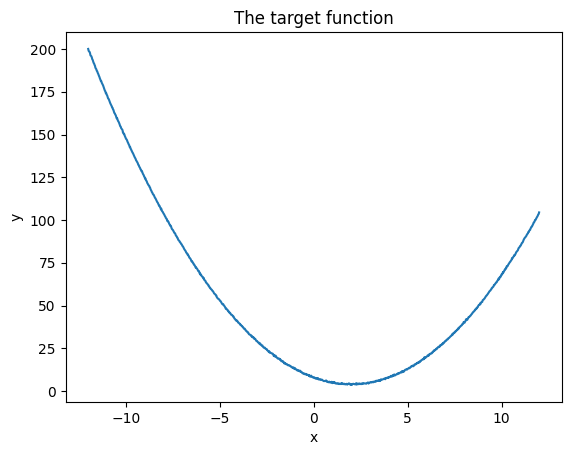

In [19]:
x = np.linspace (-12,12,1000)
def fnc(x,N):   # N is number of data points to be generated from the target function. 
#If you want to generate a single data point put N=1. If you want to plot the target function put higher value of N.
    N = np.random.normal(0,0.2,N)
    return (x-2)**2 + 4 + N
plt.title("The target function")
# plt.xlim(0,4)
# plt.ylim(0,10)
plt.xlabel("x")
plt.ylabel("y")
# plt.scatter(x,y)
plt.plot(x,fnc(x,1000))

[[  7.91523766  39.29643079]
 [  9.32292073  57.50434145]
 [ -8.31854451 110.72311082]]


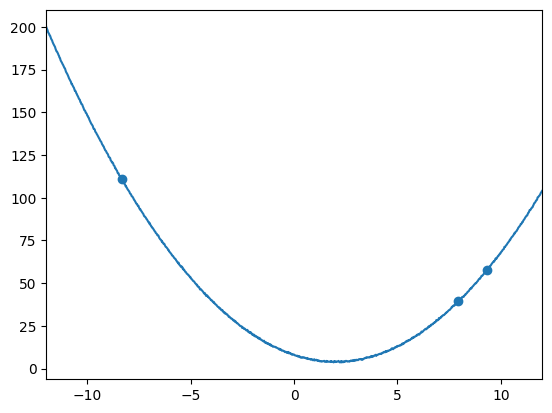

In [20]:
import numpy as np

# np.random.seed(129292)
# Start with an empty array (0 rows, 2 columns)
data_array = np.empty((0, 2))

# Adding points one by one
# data_array = np.vstack([data_array, [1, 10]])
# data_array = np.vstack([data_array, [2, 20]])
# data_array = np.vstack([data_array, [3, 30]])

for i in range(3):
    xl = np.random.uniform(-10,10,1).item()
    data = np.array([[xl, fnc(xl,1).item()]])
    data_array = np.vstack([data_array, data])


print(data_array)

x_values = data_array[:, 0]  # First column
y_values = data_array[:, 1]  # Second column
plt.scatter(x_values,y_values)
plt.xlim(-12,12)
plt.plot(x,fnc(x,1000))
